In [1]:
import numpy as np

In [79]:
def loadDataSet(fileName):
    with open(fileName) as f:
        numFeat = len(f.readline().split('\t')) - 1 
    with open(fileName) as f:
        dataMat = []; labelMat = []
        for line in f.readlines():
            lineArr = []
            curLine = line.strip().split('\t')
            for i in range(numFeat):
                lineArr.append(float(curLine[i]))
            dataMat.append(lineArr)
            labelMat.append(float(curLine[-1]))
    return np.array(dataMat), np.array(labelMat)

def standRegres(xArr, yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr)
    xTx = xMat.T * xMat
    if np.linalg.det(xTx) == 0.0:   # 计算行列式
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * yMat.T)
    return ws 

In [25]:
xArr, yArr = loadDataSet('ex0.txt')
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [26]:
ws = standRegres(xArr, yArr)
ws

matrix([[3.00774324],
        [1.69532264]])

In [28]:
xMat = np.mat(xArr)
yMat = np.mat(yArr).T
yHat = xMat * ws 
xMat.shape, yMat.shape, yHat.shape

((200, 2), (200, 1), (200, 1))

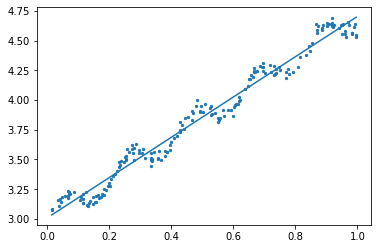

In [41]:
import matplotlib.pyplot as plt 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:, 1].flatten().A[0], yMat[:,0].flatten().A[0], s = 5)
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy * ws 
ax.plot(xCopy[:,1], yHat)
plt.show()

In [52]:
yHat = xMat * ws 
np.corrcoef(yHat.T.A, yMat.T.A)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

In [80]:
# 局部加权线性回归

def lwlr(testPoint, xArr, yArr, k=1.0):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T 
    m = xMat.shape[0]
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diffMat = testPoint - xMat[j, :]
        weights[j,j] = np.exp(diffMat * diffMat.T / (-2.0*k**2))
    xTx = xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return 
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

def lwlrTest(testArr, xArr, yArr, k=1.0):
    m = testArr.shape[0]
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

In [81]:
xArr, yArr = loadDataSet('ex0.txt')

In [82]:
lwlr(xArr[0], xArr, yArr, 1.0)

matrix([[3.12204471]])

In [83]:
lwlr(xArr[0], xArr, yArr, 0.001)

matrix([[3.20175729]])

In [105]:
yHat = lwlrTest(xArr, xArr, yArr, 0.01)

In [106]:
xMat = np.mat(xArr)
srtInd = xMat[:, 1].argsort(0)
xSort = xMat[srtInd][:, 0, :]

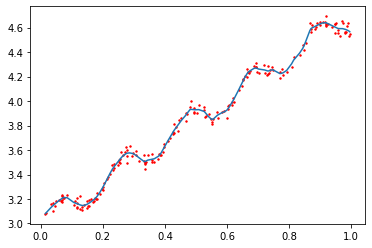

In [107]:
import matplotlib.pyplot as plt 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:, 1], yHat[srtInd])
ax.scatter(xArr[:,1], yArr, s=2, c='red')

In [108]:
# 预测鲍鱼年龄

def rssError(yArr, yHatArr):
    return ((yArr - yHatArr)**2).sum()

In [109]:
abX, abY = loadDataSet('abalone.txt')
yHat01 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 0.1)
yHat1 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 1)
yHat10 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 10)

In [113]:
print(rssError(abY[0:99], yHat01.T))
print(rssError(abY[0:99], yHat1.T))
print(rssError(abY[0:99], yHat10.T))

56.78420911837319
429.8905618703138
549.1181708827038


In [115]:
yHat01 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 0.1)
yHat1 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 1)
yHat10 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 10)
print(rssError(abY[100:199], yHat01.T))
print(rssError(abY[100:199], yHat1.T))
print(rssError(abY[100:199], yHat10.T))

25119.417511792763
573.5261441897468
517.571190538318


In [117]:
ws = standRegres(abX[0:99], abY[0:99])
yHat = np.mat(abX[100:199]) * ws 
rssError(abY[100:199], yHat.T.A)

518.6363153249081